In [1]:
from google.colab import files
uploaded = files.upload()

Saving Input.pdf to Input.pdf


In [2]:
pip install pdf2image

In [3]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.2 [186 kB]
Fetched 186 kB in 1s (209 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.2_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.2) ...
Setting up poppler-utils (22.02.0-2ubuntu0.2) ...
Processing triggers for man-db (2.10.2-1) ...


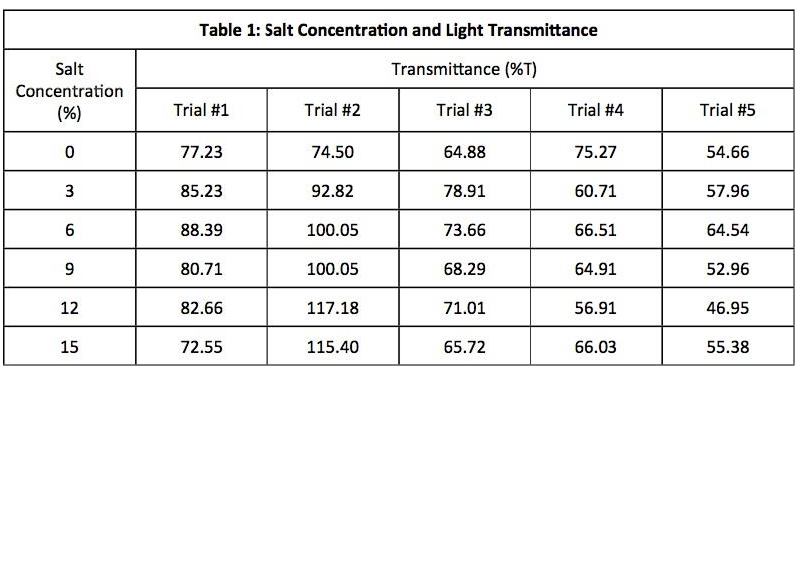

In [5]:
from pdf2image import convert_from_path, convert_from_bytes
from IPython.display import display, Image

images = convert_from_bytes(open('Input.pdf', 'rb').read(), size=800)
display(images[0])

In [6]:
pip install pdf2image

In [7]:
from pdf2image import convert_from_path

In [8]:
images = convert_from_path('Input.pdf')

for i in range(len(images)):

      # Save pages as images in the pdf
    images[i].save('page'+ str(i) +'.jpg', 'JPEG')

In [9]:
from google.colab import drive
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sample=r'/content/page0.jpg'

read_image= cv2.imread(sample,0)

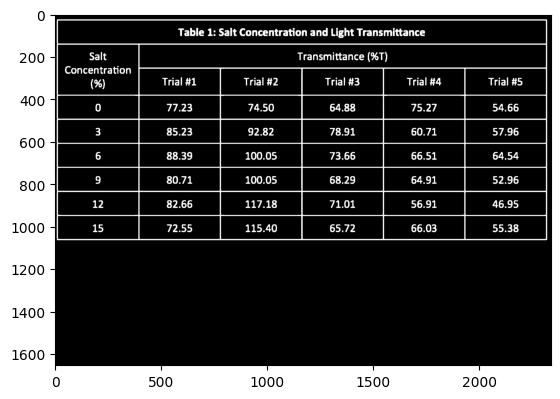

In [10]:
convert_bin,grey_scale = cv2.threshold(read_image,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
grey_scale = 255-grey_scale
grey_graph = plt.imshow(grey_scale,cmap='gray')
plt.show()

In [11]:
length = np.array(read_image).shape[1]//100
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (length, 1))

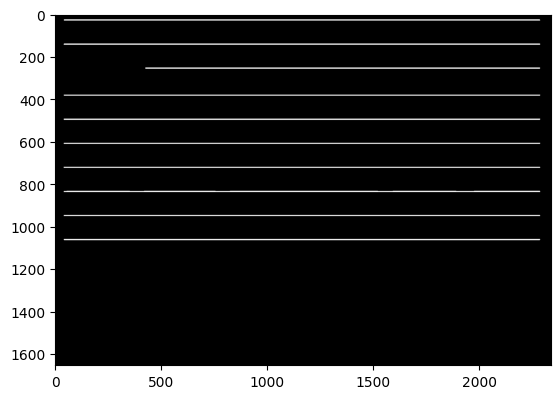

In [12]:
horizontal_detect = cv2.erode(grey_scale, horizontal_kernel, iterations=3)
hor_line = cv2.dilate(horizontal_detect, horizontal_kernel, iterations=3)
plotting = plt.imshow(horizontal_detect,cmap='gray')
plt.show()

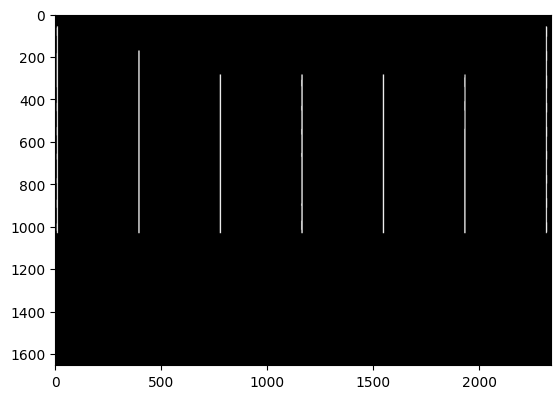

In [13]:
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, length))
vertical_detect = cv2.erode(grey_scale, vertical_kernel, iterations=3)
ver_lines = cv2.dilate(vertical_detect, vertical_kernel, iterations=3)
show = plt.imshow(vertical_detect,cmap='gray')
plt.show()

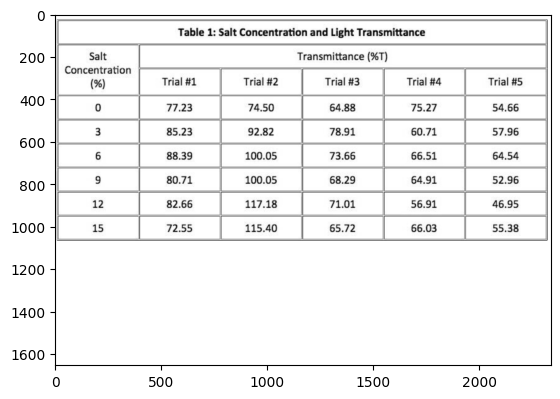

In [14]:
final = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
combine = cv2.addWeighted(ver_lines, 0.5, hor_line, 0.5, 0.0)
combine = cv2.erode(~combine, final, iterations=2)
thresh, combine = cv2.threshold(combine,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
convert_xor = cv2.bitwise_xor(read_image,combine)
inverse = cv2.bitwise_not(convert_xor)
output= plt.imshow(inverse,cmap='gray')
plt.show()

In [15]:
cont, _ = cv2.findContours(combine, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
def get_boxes(num, method="left-to-right"):
    invert = False
    flag = 0
    if method == "right-to-left" or method == "bottom-to-top":
        invert = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        flag = 1
    boxes = [cv2.boundingRect(c) for c in num]
    (num, boxes) = zip(*sorted(zip(num, boxes),key=lambda b:b[1][flag], reverse=invert))
    return (num, boxes)
cont, boxes = get_boxes(cont, method="top-to-bottom")

In [ ]:
path = r'/content/page0.jpg'

AxesImage(size=(1654, 2339))


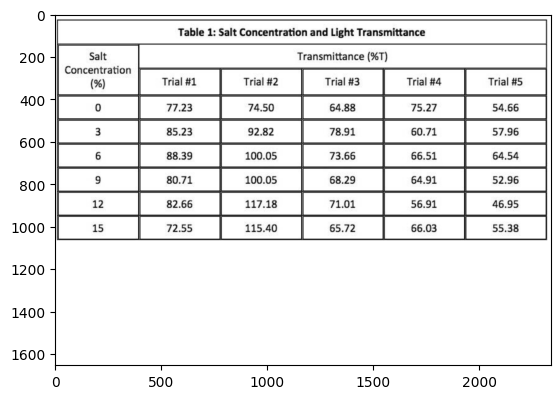

In [16]:
final_box = []
for c in cont:
    s1, s2, s3, s4 = cv2.boundingRect(c)
    if (s3<500 and s4<500):
        rectangle_img = cv2.rectangle(read_image,(s1,s2),(s1+s3,s2+s4),(0,255,0),2)
        final_box.append([s1,s2,s3,s4])
graph = plt.imshow(rectangle_img,cmap='gray')
print(graph)
plt.show(graph)

In [17]:
len(final_box)

42

In [18]:
dim = [boxes[i][3] for i in range(len(boxes))]
avg = np.mean(dim)
hor=[]
ver=[]
for i in range(len(boxes)):
    if(i==0):
        ver.append(boxes[i])
        last=boxes[i]
    else:
        if(boxes[i][1]<=last[1]+avg/2):
            ver.append(boxes[i])
            last=boxes[i]
            if(i==len(boxes)-1):
                hor.append(ver)
        else:
            hor.append(ver)
            ver=[]
            last = boxes[i]
            ver.append(boxes[i])
total = 0
for i in range(len(hor)):
    total = len(hor[i])
    if total > total:
        total = total
mid = [int(hor[i][j][0]+hor[i][j][2]/2) for j in range(len(hor[i])) if hor[0]]
mid=np.array(mid)
mid.sort()

In [19]:
order = []
for i in range(len(hor)):
    arrange=[]
    for k in range(total):
        arrange.append([])
    for j in range(len(hor[i])):
        sub = abs(mid-(hor[i][j][0]+hor[i][j][2]/4))
        lowest = min(sub)
        idx = list(sub).index(lowest)
        arrange[idx].append(hor[i][j])
    order.append(arrange)

In [20]:
!pip install pytesseract

In [21]:


pip install Image

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 34.4 MB/s eta 0:00:00
  Created wheel for Image: filename=image-1.5.33-py2.py3-none-any.whl size=19481 sha256=f65cc73fdd9b8df39e8fbb814f9c9261299e4f6eb3adac8a1440d4ddecbe1fd5
  Stored in directory: /root/.cache/pip/wheels/70/0c/a4/7cfa53a5c6225c2db2bfec08e782b43d0f25fdae2e995b69be
Successfully built Image


In [22]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

In [23]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,993 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [24]:
extract=[]
for i in range(len(order)):
    for j in range(len(order[i])):
        inside=''
        if(len(order[i][j])==0):
            extract.append(' ')
        else:
            for k in range(len(order[i][j])):
                side1,side2,width,height = order[i][j][k][0],order[i][j][k][1], order[i][j][k][2],order[i][j][k][3]
                final_extract = read_image[side2:side2+height, side1:side1+width]
                final_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                get_border = cv2.copyMakeBorder(final_extract,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resize = cv2.resize(get_border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dil = cv2.dilate(resize, final_kernel,iterations=1)
                ero = cv2.erode(dil, final_kernel,iterations=2)
                ocr = pytesseract.image_to_string(ero)
                if(len(ocr)==0):
                    ocr = pytesseract.image_to_string(ero, config='--psm 3')
                inside = inside +" "+ ocr
            extract.append(inside)

In [25]:
a = np.array(extract)
dataset = pd.DataFrame(a.reshape(len(hor), total))
dataset.to_csv("/content/output1.csv")

In [26]:
df = pd.read_csv("output1.csv")
df.head()

,Unnamed: 0,0,1,2,3,4,5
0,0,,Table 1: Salt Concentration and Light Transmi...,,,,
1,1,\n\nSalt\nConcentration\n(%)\n\n \n,,Transmittance (%T)\n,,,
2,2,,Trial #1\n,Trial #2\n,Trial #3\n,Trial #4\n,Trial #5\n
3,3,,77.23\n,74.50\n,64.88\n,75.27\n,54.66\n
4,4,,85.23\n,92.82\n,78.91\n,60.71\n,57.96\n
